In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

# webcam capture in Colab
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode # image as text.
import cv2

In [ ]:
# MNIST dataset= Modified National Institute of Standards and Technology
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Shape of x_train: {x_train.shape}") #60000-28*28-image
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")  #10000-label(the correct ans)
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:
# Normalize -Feature Scaling
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
#flatten 1D for Dense layer -num sample
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(784,)),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])

model.summary()

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train
h = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.3,
    callbacks=[early_stop]
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7161 - loss: 0.8819 - val_accuracy: 0.9389 - val_loss: 0.1973
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9244 - loss: 0.2661 - val_accuracy: 0.9505 - val_loss: 0.1625
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9424 - loss: 0.1967 - val_accuracy: 0.9620 - val_loss: 0.1266
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9523 - loss: 0.1571 - val_accuracy: 0.9677 - val_loss: 0.1102
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9579 - loss: 0.1390 - val_accuracy: 0.9689 - val_loss: 0.1061
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9612 - loss: 0.1279 - val_accuracy: 0.9687 - val_loss: 0.1052
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9670 - loss: 0.1117 - val_accuracy: 0.9707 - val_loss: 0.0983
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9709 - loss: 0.0971 - val_accuracy: 0.

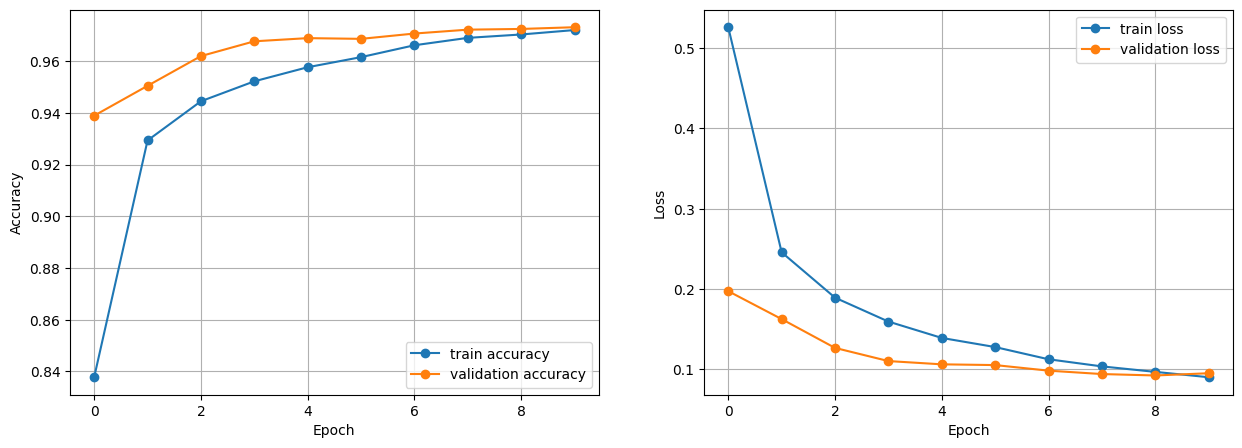

In [ ]:

# Plot training history
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.1010

Test accuracy: 0.9745000004768372


In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();//Stop Webcam
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Photo captured! Processing...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


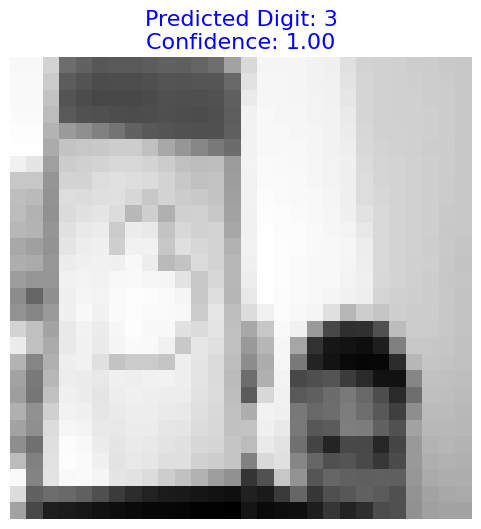

Predicted digit: 3 (confidence: 1.00)


In [ ]:
def predict_from_camera():
  try:
    filename = take_photo()
    print('Photo captured! Processing...')

    # Load captured image with OpenCV
    img = cv2.imread(filename, cv2.IMREAD_COLOR)

    # Preprocess: grayscale, resize, invert, normalize
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

    # Invert (MNIST has white digits on black background)
    inverted = 255 - resized

    # Normalize
    processed = inverted.astype("float32") / 255.0

    # Reshape for model
    input_img = processed.reshape(1, 784)

    # Predict
    predictions = model.predict(input_img)
    digit = np.argmax(predictions)
    confidence = predictions[0][digit]

    # Display
    plt.figure(figsize=(6,6))
    plt.imshow(resized, cmap='gray')  # Show original captured (non-inverted) for better visibility
    plt.title(f"Predicted Digit: {digit}\nConfidence: {confidence:.2f}", fontsize=16, color='blue' if confidence > 0.9 else 'red')
    plt.axis('off')
    plt.show()

    print(f"Predicted digit: {digit} (confidence: {confidence:.2f})")

  except Exception as e:
    print(f"Error: {str(e)}")

# Run this to test with your camera!
predict_from_camera()